In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

from ecbdata import ecbdata



In [25]:
df_in = ecbdata.get_series('ICP.M.U2.N.000000.4.ANR', start='2015-01') 
df_ir = pd.read_csv('ECB_InterestRates.csv') # Source: https://data.ecb.europa.eu/data/datasets/FM/FM.B.U2.EUR.4F.KR.MRR_FR.LEV?chart_props=W3sibm9kZUlkIjoiMzQ2NTY5IiwicHJvcGVydGllcyI6W3siY29sb3JIZXgiOiIiLCJjb2xvclR5cGUiOiIiLCJjaGFydFR5cGUiOiJsaW5lY2hhcnQiLCJsaW5lU3R5bGUiOiJTb2xpZCIsImxpbmVXaWR0aCI6IjEuNSIsImF4aXNQb3NpdGlvbiI6ImxlZnQiLCJvYnNlcnZhdGlvblZhbHVlIjpmYWxzZSwiZGF0ZXMiOlsiMjAxNS0wNi0xNFQyMjowMDowMC4wMDBaIiwiMjAyNC0wNi0xMVQyMjowMDowMC4wMDBaIl0sImlzVGRhdGEiOmZhbHNlLCJtb2RpZmllZFVuaXRUeXBlIjoiIiwieWVhciI6ImRhdGV3aXNlIiwic3RhcnREYXRlIjoiMjAxNS0wNi0xNSIsImVuZERhdGUiOiIyMDI0LTA2LTEyIiwic2V0RGF0ZSI6dHJ1ZSwic2hvd1RhYmxlRGF0YSI6ZmFsc2UsImNoYW5nZU1vZGUiOmZhbHNlLCJzaG93TWVudVN0eWxlQ2hhcnQiOmZhbHNlLCJkaXNwbGF5TW9iaWxlQ2hhcnQiOnRydWUsInNjcmVlblNpemUiOiJtYXgiLCJzY3JlZW5XaWR0aCI6MTQ3MCwic2hvd1RkYXRhIjpmYWxzZSwidHJhbnNmb3JtZWRGcmVxdWVuY3kiOiJub25lIiwidHJhbnNmb3JtZWRVbml0Ijoibm9uZSIsImZyZXF1ZW5jeSI6Im5vbmUiLCJ1bml0Ijoibm9uZSIsIm1vZGlmaWVkIjoiZmFsc2UiLCJzZXJpZXNLZXkiOiJkYWlseSAtIGJ1c2luZXNzd2VlayIsInNob3d0YWJsZVN0YXRlQmVmb3JlTWF4U2NyZWVuIjpmYWxzZSwiaXNkYXRhY29tcGFyaXNvbiI6ZmFsc2UsInNlcmllc0ZyZXF1ZW5jeSI6ImRhaWx5IC0gYnVzaW5lc3N3ZWVrIiwiaW50aWFsU2VyaWVzRnJlcXVlbmN5IjoiZGFpbHkgLSBidXNpbmVzc3dlZWsiLCJtZXRhZGF0YURlY2ltYWwiOiI0IiwiaXNUYWJsZVNvcnRlZCI6ZmFsc2UsImlzWWVhcmx5VGRhdGEiOmZhbHNlLCJyZXNwb25zZURhdGFFbmREYXRlIjoiMjAyNC0wNi0xMiIsImlzaW5pdGlhbENoYXJ0RGF0YSI6dHJ1ZSwiaXNEYXRlc0Zyb21EYXRlUGlja2VyIjp0cnVlLCJkYXRlUGlja2VyRW5kRGF0ZSI6IjIwMjQtMDYtMTIiLCJpc0RhdGVQaWNrZXJFbmREYXRlIjp0cnVlLCJzZXJpZXNrZXlTZXQiOiIiLCJkYXRhc2V0SWQiOiI2NyIsImlzQ2FsbGJhY2siOmZhbHNlLCJpc1NsaWRlclRkYXRhIjp0cnVlLCJpc1NsaWRlckRhdGEiOnRydWUsImlzSW5pdGlhbENoYXJ0RGF0YUZyb21HcmFwaCI6ZmFsc2UsImNoYXJ0U2VyaWVzS2V5IjoiRk0uQi5VMi5FVVIuNEYuS1IuTVJSX0ZSLkxFViIsInR5cGVPZiI6IiJ9XX1d
df = pd.read_csv("Final_Working_Data.csv")
speaker_info = pd.read_csv("Speakers_Info.csv")

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
data_subset = df[['Date', 'pos_metaphors_len', 'text_length']]

grouped_data = final_data.groupby('Month').agg(COUNT=('pos_metaphors_len', 'count'), # Number of interviews
                                               SUM=('pos_metaphors_len', 'sum'), # Number of metaphors
                                               AVERAGE_TXT_LENGTH=('text_length', 'mean')) # Average text length


grouped_data = grouped_data[grouped_data.index >= '2015-12-31']
# The result is a DataFrame with 'Month' as index and two columns: 'count' and 'sum'
grouped_data.head(10)

,COUNT,SUM,AVERAGE_TXT_LENGTH
Month,,,
2015-12,4,3,9890.50
2016-01,3,12,6491.00
2016-02,3,4,5643.00
2016-03,4,1,7632.75
2016-04,3,2,8507.00
2016-05,4,7,10394.25
2016-06,1,0,9304.00
2016-07,2,0,8078.50
2016-08,1,0,4900.00


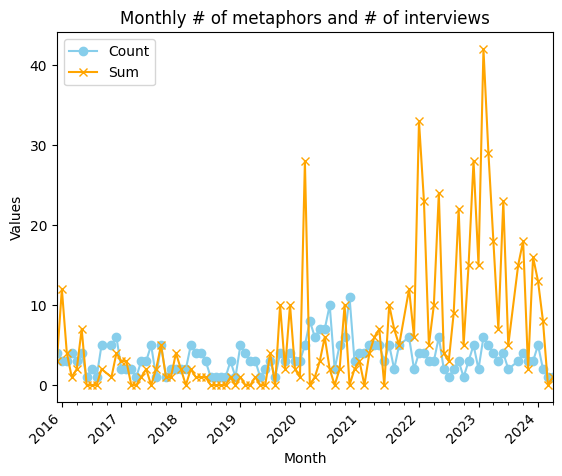

In [5]:
fig, ax = plt.subplots()

# Change to line plot
grouped_data['COUNT'].plot(kind='line', color='skyblue', ax=ax, label='Count', marker='o')
grouped_data['SUM'].plot(kind='line', color='orange', ax=ax, label='Sum', marker='x')

# Add title, legend, and labels
ax.set_title('Monthly # of metaphors and # of interviews')
ax.set_xlabel('Month')
ax.set_ylabel('Values')
plt.legend()

# Adjust x-axis to show 1 in every 10 labels
ticks = ax.get_xticks()
# Ensure there are enough ticks to filter
if len(ticks) > 10:
    selected_ticks = ticks[::10]  # Select every 10th tick
    selected_labels = [grouped_data.index[int(tick)].strftime('%Y-%m') if tick < len(grouped_data.index) else '' for tick in selected_ticks]
    ax.set_xticks(selected_ticks)
    ax.set_xticklabels(selected_labels, rotation=45, ha="right")
else:
    # If not enough ticks, just rotate existing for clarity
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Show plot
plt.show()

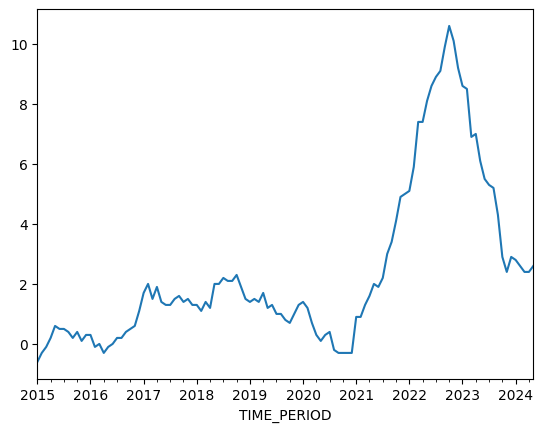

In [5]:
df_in['TIME_PERIOD'] = pd.to_datetime(df_in['TIME_PERIOD']) 
df_in = df_in[['OBS_VALUE', 'TIME_PERIOD']]   
df_in.set_index('TIME_PERIOD', inplace=True)  # Set 'TIME_PERIOD' as the index of df_in


df_in['OBS_VALUE'].plot()  # Plot the 'OBS_VALUE' column
plt.show()

In [6]:
df_ir = pd.read_csv('ECB_InterestRates.csv') # Source: https://data.ecb.europa.eu/data/datasets/FM/FM.B.U2.EUR.4F.KR.MRR_FR.LEV?chart_props=W3sibm9kZUlkIjoiMzQ2NTY5IiwicHJvcGVydGllcyI6W3siY29sb3JIZXgiOiIiLCJjb2xvclR5cGUiOiIiLCJjaGFydFR5cGUiOiJsaW5lY2hhcnQiLCJsaW5lU3R5bGUiOiJTb2xpZCIsImxpbmVXaWR0aCI6IjEuNSIsImF4aXNQb3NpdGlvbiI6ImxlZnQiLCJvYnNlcnZhdGlvblZhbHVlIjpmYWxzZSwiZGF0ZXMiOlsiMjAxNS0wNi0xNFQyMjowMDowMC4wMDBaIiwiMjAyNC0wNi0xMVQyMjowMDowMC4wMDBaIl0sImlzVGRhdGEiOmZhbHNlLCJtb2RpZmllZFVuaXRUeXBlIjoiIiwieWVhciI6ImRhdGV3aXNlIiwic3RhcnREYXRlIjoiMjAxNS0wNi0xNSIsImVuZERhdGUiOiIyMDI0LTA2LTEyIiwic2V0RGF0ZSI6dHJ1ZSwic2hvd1RhYmxlRGF0YSI6ZmFsc2UsImNoYW5nZU1vZGUiOmZhbHNlLCJzaG93TWVudVN0eWxlQ2hhcnQiOmZhbHNlLCJkaXNwbGF5TW9iaWxlQ2hhcnQiOnRydWUsInNjcmVlblNpemUiOiJtYXgiLCJzY3JlZW5XaWR0aCI6MTQ3MCwic2hvd1RkYXRhIjpmYWxzZSwidHJhbnNmb3JtZWRGcmVxdWVuY3kiOiJub25lIiwidHJhbnNmb3JtZWRVbml0Ijoibm9uZSIsImZyZXF1ZW5jeSI6Im5vbmUiLCJ1bml0Ijoibm9uZSIsIm1vZGlmaWVkIjoiZmFsc2UiLCJzZXJpZXNLZXkiOiJkYWlseSAtIGJ1c2luZXNzd2VlayIsInNob3d0YWJsZVN0YXRlQmVmb3JlTWF4U2NyZWVuIjpmYWxzZSwiaXNkYXRhY29tcGFyaXNvbiI6ZmFsc2UsInNlcmllc0ZyZXF1ZW5jeSI6ImRhaWx5IC0gYnVzaW5lc3N3ZWVrIiwiaW50aWFsU2VyaWVzRnJlcXVlbmN5IjoiZGFpbHkgLSBidXNpbmVzc3dlZWsiLCJtZXRhZGF0YURlY2ltYWwiOiI0IiwiaXNUYWJsZVNvcnRlZCI6ZmFsc2UsImlzWWVhcmx5VGRhdGEiOmZhbHNlLCJyZXNwb25zZURhdGFFbmREYXRlIjoiMjAyNC0wNi0xMiIsImlzaW5pdGlhbENoYXJ0RGF0YSI6dHJ1ZSwiaXNEYXRlc0Zyb21EYXRlUGlja2VyIjp0cnVlLCJkYXRlUGlja2VyRW5kRGF0ZSI6IjIwMjQtMDYtMTIiLCJpc0RhdGVQaWNrZXJFbmREYXRlIjp0cnVlLCJzZXJpZXNrZXlTZXQiOiIiLCJkYXRhc2V0SWQiOiI2NyIsImlzQ2FsbGJhY2siOmZhbHNlLCJpc1NsaWRlclRkYXRhIjp0cnVlLCJpc1NsaWRlckRhdGEiOnRydWUsImlzSW5pdGlhbENoYXJ0RGF0YUZyb21HcmFwaCI6ZmFsc2UsImNoYXJ0U2VyaWVzS2V5IjoiRk0uQi5VMi5FVVIuNEYuS1IuTVJSX0ZSLkxFViIsInR5cGVPZiI6IiJ9XX1d
df_ir.rename(columns={'Main refinancing operations - fixed rate tenders (fixed rate) (date of changes) - Level (FM.B.U2.EUR.4F.KR.MRR_FR.LEV)': 'INTEREST RATE'}, inplace=True)
df_ir['TIME_PERIOD'] = pd.to_datetime(df_ir['DATE'])
df_ir = df_ir[['INTEREST RATE', 'TIME_PERIOD']]
df_ir_filtered = df_ir[df_ir['TIME_PERIOD'] >= '2015-01-01']
df_ir_filtered.set_index('TIME_PERIOD', inplace=True)
# Resample to monthly frequency and forward fill missing values
df_ir_monthly = df_ir_filtered.resample('M').ffill()

In [7]:
grouped_data.index = grouped_data.index.to_timestamp()
# Standardize the index to the end of the month for all DataFrames
df_ir_monthly.index = df_ir_monthly.index + pd.offsets.MonthEnd(0)
df_in.index = df_in.index + pd.offsets.MonthEnd(0)
grouped_data.index = pd.to_datetime(grouped_data.index, format='%Y-%m') + pd.offsets.MonthEnd(0)

# Convert index to a column for merging
df_ir_monthly['TIME_PERIOD'] = df_ir_monthly.index
df_in['TIME_PERIOD'] = df_in.index
grouped_data['TIME_PERIOD'] = grouped_data.index

# Set the new columns as the index
df_ir_monthly.set_index('TIME_PERIOD', inplace=True)
df_in.set_index('TIME_PERIOD', inplace=True)
grouped_data.set_index('TIME_PERIOD', inplace=True)

# Merge DataFrames on the date index, keeping only rows with data in all three
df_merged = df_ir_monthly.join(df_in, how='inner').join(grouped_data, how='inner')
df_merged['DATE'] = pd.to_datetime(df_merged.index)

# Display the merged DataFrame
print(df_merged.tail())



             INTEREST RATE  OBS_VALUE  COUNT  SUM  AVERAGE_TXT_LENGTH  \
TIME_PERIOD                                                             
2023-12-31             4.5        2.9      3   16         9685.333333   
2024-01-31             4.5        2.8      5   13         7072.400000   
2024-02-29             4.5        2.6      2    8        12607.500000   
2024-03-31             4.5        2.4      1    0         4584.000000   
2024-04-30             4.5        2.4      1    1         5575.000000   

                  DATE  
TIME_PERIOD             
2023-12-31  2023-12-31  
2024-01-31  2024-01-31  
2024-02-29  2024-02-29  
2024-03-31  2024-03-31  
2024-04-30  2024-04-30  


In [26]:
speaker_info.head(25)

,Member,YoB,Gender,Country,Period Start,Period End
0,Jean-Claude Trichet,1942,M,France,2003,2011
1,Otmar Issing,1936,M,Germany,1998,2006
2,Lucas Papademos,1947,M,Greece,2002,2010
3,Lorenzo Bini Smaghi,1956,M,Italy,2005,2011
4,José Manuel González-Páramo,1958,M,Spain,2004,2012
5,Tommaso Padoa-Schioppa,1940,M,Italy,1998,2005
6,Mario Draghi,1947,M,Italy,2011,2019
7,Peter Praet,1949,M,Belgium,2011,2019
8,Benoît Cœuré,1969,M,France,2012,2019
9,Jörg Asmussen,1966,M,Germany,2012,2016


In [27]:
# Convert 'Period Start' to datetime
speaker_info['Period Start'] = pd.to_datetime(speaker_info['Period Start'], format='%Y', errors='coerce')
speaker_info['Period Start'].fillna(pd.Timestamp('now').year, inplace=True)  # Default to current year if invalid

# Replace 'TBD' in 'Period End' with an appropriate end date (e.g., '9999-12-31' for ongoing terms)
speaker_info['Period End'].replace('TBD', pd.Timestamp('2026-12-31'), inplace=True)
speaker_info['Period End'] = pd.to_datetime(speaker_info['Period End'], errors='coerce')

In [28]:
speaker_info['Period End']

0    2011-01-01
1    2006-01-01
2    2010-01-01
3    2011-01-01
4    2012-01-01
5    2005-01-01
6    2019-01-01
7    2019-01-01
8    2019-01-01
9    2016-01-01
10   2019-01-01
11   2018-01-01
12   2019-01-01
13   2026-12-31
14   2026-12-31
15   2026-12-31
16   2026-12-31
17   2026-12-31
18   2026-12-31
Name: Period End, dtype: datetime64[ns]

In [29]:
# Create boolean columns for each speaker in df_merged
for speaker in speaker_info['Member']:
    period_start = speaker_info.loc[speaker_info['Member'] == speaker, 'Period Start'].values[0]
    period_end = speaker_info.loc[speaker_info['Member'] == speaker, 'Period End'].values[0]
    df_merged[speaker] = (df_merged.index >= period_start) & (df_merged.index <= period_end)

In [31]:
# List to hold columns with only False observations
columns_with_only_false = []

# Iterate over each column in df_merged
for column in df_merged.columns:
    # Check if all values in the column are False
    if (df_merged[column] == False).all():
        columns_with_only_false.append(column)

# Drop the columns with only False observations from df_merged
df_merged.drop(columns=columns_with_only_false, inplace=True)

# Print the list of dropped columns
print("Dropped columns with only False observations:", columns_with_only_false)
# These columns correspond to speakers who were not present during the selected time period.

Dropped columns with only False observations: ['Jean-Claude Trichet', 'Otmar Issing', 'Lucas Papademos', 'Lorenzo Bini Smaghi', 'José Manuel González-Páramo', 'Tommaso Padoa-Schioppa']


In [32]:
df_merged.head()

,INTEREST RATE,OBS_VALUE,COUNT,SUM,AVERAGE_TXT_LENGTH,DATE,Mario Draghi,Peter Praet,Benoît Cœuré,Jörg Asmussen,Yves Mersch,Vítor Constâncio,Sabine Lautenschläger,Christine Lagarde,Luis de Guindos,Philip R. Lane,Fabio Panetta,Isabel Schnabel,Frank Elderson
TIME_PERIOD,,,,,,,,,,,,,,,,,,,
2015-12-31,0.05,0.3,4,3,9890.50,2015-12-31,True,True,True,True,True,True,True,False,False,False,False,False,False
2016-01-31,0.05,0.3,3,12,6491.00,2016-01-31,True,True,True,False,True,True,True,False,False,False,False,False,False
2016-02-29,0.05,-0.1,3,4,5643.00,2016-02-29,True,True,True,False,True,True,True,False,False,False,False,False,False
2016-03-31,0.00,0.0,4,1,7632.75,2016-03-31,True,True,True,False,True,True,True,False,False,False,False,False,False
2016-04-30,0.00,-0.3,3,2,8507.00,2016-04-30,True,True,True,False,True,True,True,False,False,False,False,False,False


In [37]:
import pandas as pd
import statsmodels.api as sm

# Assuming df_merged is your DataFrame with numeric and categorical variables
# Convert categorical variables (speaker names) to dummy variables
speaker_dummies = pd.get_dummies(df_merged[['Mario Draghi', 'Peter Praet', 'Benoît Cœuré',
                                            'Jörg Asmussen', 'Yves Mersch', 'Vítor Constâncio',
                                            'Sabine Lautenschläger', 'Christine Lagarde',
                                            'Luis de Guindos', 'Philip R. Lane', 'Fabio Panetta',
                                            'Isabel Schnabel', 'Frank Elderson']])

# Combine dummy variables with numeric variables
X = pd.concat([df_merged[['INTEREST RATE', 'OBS_VALUE', 'COUNT', 'AVERAGE_TXT_LENGTH']], speaker_dummies], axis=1)

# Ensure all columns in X are numeric
X = X.astype(float)  # Convert all columns to float (adjust as needed)

# Target variable
y = df_merged['SUM']

# Add constant to the predictor variables (required for statsmodels)
X = sm.add_constant(X)

# Fit Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print model summary
print(poisson_model.summary())

INTEREST RATE            float64
OBS_VALUE                float64
COUNT                    float64
AVERAGE_TXT_LENGTH       float64
Mario Draghi             float64
Peter Praet              float64
Benoît Cœuré             float64
Jörg Asmussen            float64
Yves Mersch              float64
Vítor Constâncio         float64
Sabine Lautenschläger    float64
Christine Lagarde        float64
Luis de Guindos          float64
Philip R. Lane           float64
Fabio Panetta            float64
Isabel Schnabel          float64
Frank Elderson           float64
dtype: object
int64
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    SUM   No. Observations:                   98
Model:                            GLM   Df Residuals:                       89
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                 

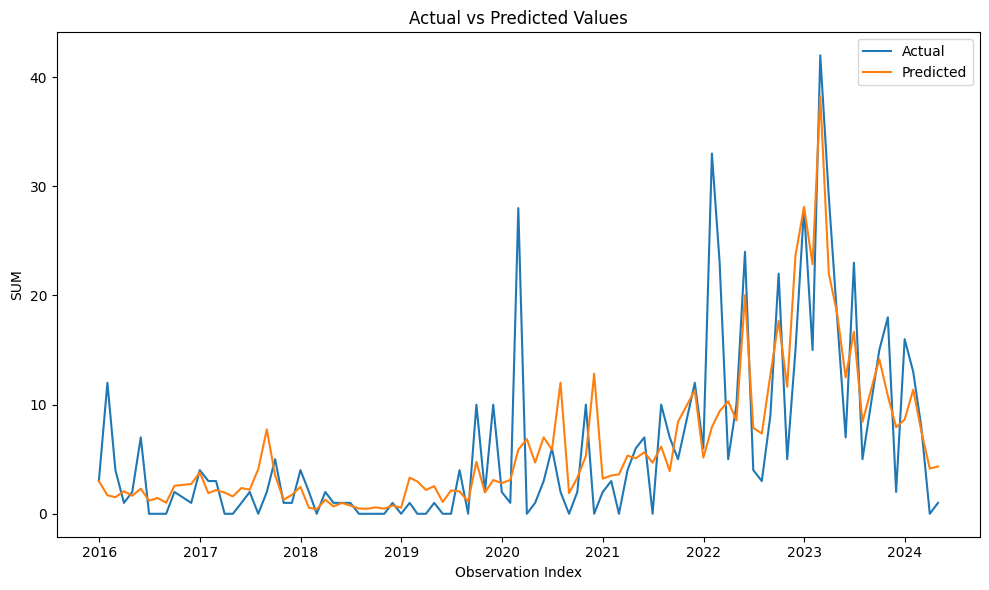

In [40]:
import seaborn as sns

# Now, to make predictions
predictions = poisson_model.predict(X)

# Create a DataFrame for actual vs predicted values
results = pd.DataFrame({'Actual': y, 'Predicted': predictions})

# Sort by the actual values for a meaningful plot
results.sort_values(by='Actual', inplace=True)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
sns.lineplot(data=results.reset_index(), x=results.index, y='Actual', label='Actual')
sns.lineplot(data=results.reset_index(), x=results.index, y='Predicted', label='Predicted')
plt.xlabel('Observation Index')
plt.ylabel('SUM')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

## -------------------- Inflation TBD --------------------------

In [45]:
# Combine dummy variables with numeric variables
X_infla = pd.concat([df_merged[['INTEREST RATE', 'SUM', 'COUNT', 'AVERAGE_TXT_LENGTH']], speaker_dummies], axis=1)

# Ensure all columns in X are numeric
X_infla = X_infla.astype(float)  # Convert all columns to float (adjust as needed)

# Target variable
y_infla = df_merged['OBS_VALUE']

# Add constant to the predictor variables (required for statsmodels)
X_infla = sm.add_constant(X_infla)

# Fit Poisson regression model
poisson_model_infla = sm.GLM(y_infla, X_infla, family=sm.families.Poisson()).fit()

# Print model summary
print(poisson_model_infla.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              OBS_VALUE   No. Observations:                   98
Model:                            GLM   Df Residuals:                       89
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -164.92
Date:                Sun, 16 Jun 2024   Deviance:                       237.32
Time:                        17:00:49   Pearson chi2:                     89.9
No. Iterations:                     6   Pseudo R-squ. (CS):             0.8125
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

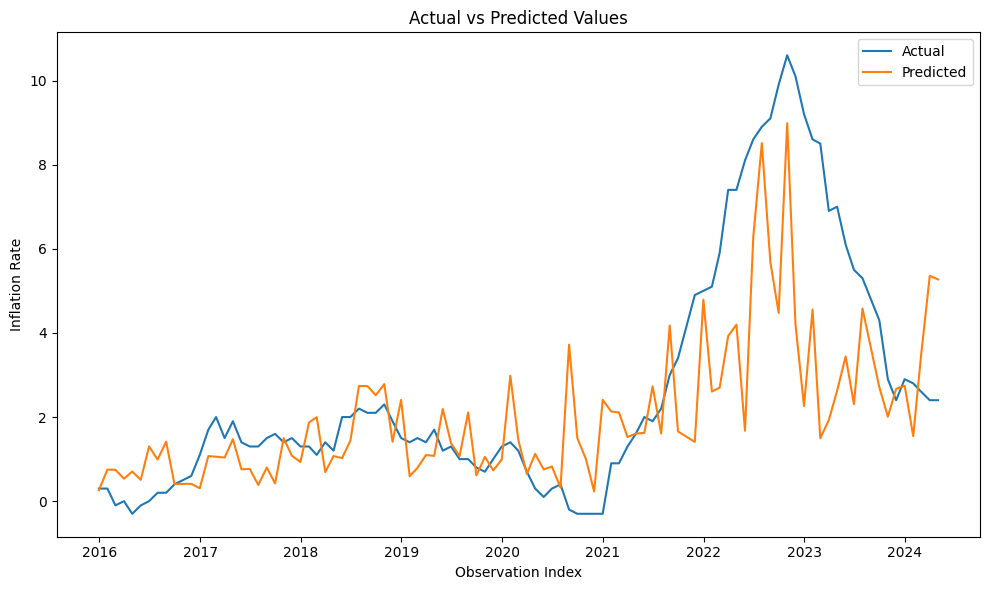

In [46]:
# Now, to make predictions
predictions_infla = poisson_model_infla.predict(X)

# Create a DataFrame for actual vs predicted values
results_infla = pd.DataFrame({'Actual': y_infla, 'Predicted': predictions_infla})

# Sort by the actual values for a meaningful plot
results_infla.sort_values(by='Actual', inplace=True)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_infla.reset_index(), x=results_infla.index, y='Actual', label='Actual')
sns.lineplot(data=results_infla.reset_index(), x=results_infla.index, y='Predicted', label='Predicted')
plt.xlabel('Observation Index')
plt.ylabel('Inflation Rate')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()